## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets as dta
#For correlation coefficient
import scipy.stats as st

#Do I want to activate the following:
#%matplotlib notebook

# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mousecombined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID",  how ="outer")

# Display the data table for preview
mousecombined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#number of unique records
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")

#determine if blank fields
mousecombined_df.count()

There are 249 unique mouse IDs records in the dataframe


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
        #DataFrame.duplicated(subset=None, keep='first')
mouseduplicates = mousecombined_df[['Mouse ID', 'Timepoint']]
mouseduplicates = mouseduplicates[mouseduplicates.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseduplicatesfull = mousecombined_df[mousecombined_df.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicatesfull


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicateindex = mouseduplicatesfull.index
duplicateindex

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #------need to see if I can use index of duplicates dataframe to drop rows rather than list all the roles
#mouseclean= mousecombined_df.drop(mousecombined_df.index[[909,911,913,915,917]])
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
mouseclean = mousecombined_df.drop(mousecombined_df.index[[duplicateindex]])

mouseclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(mouseclean), "records in the dataframe")

#number of unique records
mousecombineduniquecount = len(mouseclean["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")



There are 1888 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    #for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
regimensummary = mouseregimengroup["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
                   
#df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

Regimen_Tumor_Volume_Summary = regimensummary.rename(columns={
    "mean":"Mean Tumor Volume (mm3)",
    "median":"Median Tumor Volume (mm3)",
    "var":"Variance Tumor Volume (mm3)",
    "std":"Standard Deviation Tumor Volume (mm3)",
    "sem":"SEM Tumor Volume (mm3)"
})

Regimen_Tumor_Volume_Summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

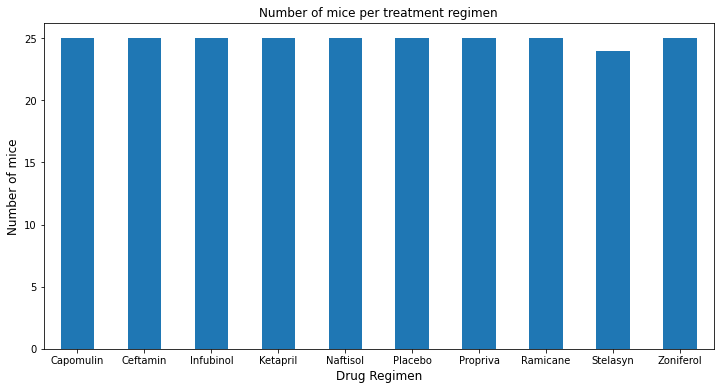

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pandas. 
regimenmice = mouseregimengroup["Mouse ID"].nunique()
#print(regimenmice)

#Y axis = number of mice
regimenY = regimenmice.values.tolist()
#print(regimenY)

#X azis = regimen
regimenX = regimenmice.index.tolist()
#print(regimenX)

regimenmice.plot.bar(figsize=(12,6), width=.5, rot=0, title='Number of mice per treatment regimen')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel("Number of mice", fontdict={'fontsize':12})

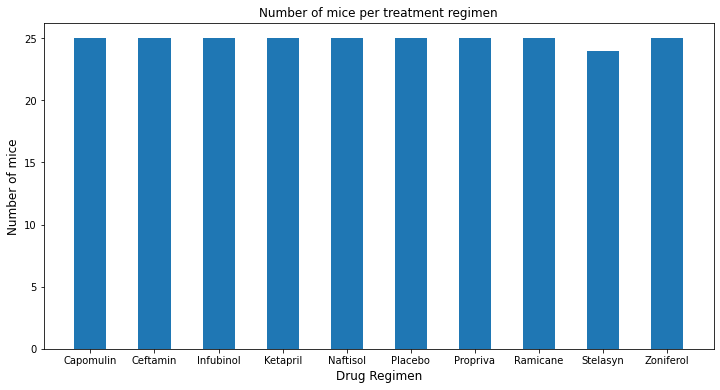

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pyplot.

plt.figure(figsize=(12,6))
plt.bar(regimenX, regimenY, width=.5,)
plt.title('Number of mice per treatment regimen')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel('Number of mice', fontdict={'fontsize':12})

plt.show()

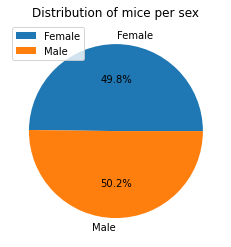

In [12]:
#Generate a pie plot using both Pandas plot
mousesexgroup = mouseclean.groupby(["Sex"])
mousesexcount = mousesexgroup["Mouse ID"].nunique()
labels = ["Female", "Male"]
#sexY = mousesexcount.values.tolist()
#print(sexY)

#x axis = number of mice
#sexX = mousesexcount.index.tolist()

mousesexcount.plot.pie(title='Distribution of mice per sex', autopct="%1.1f%%")
plt.ylabel('')
plt.legend(loc=2)

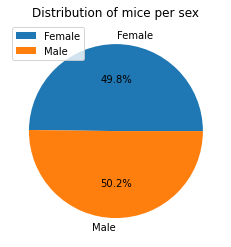

In [13]:

plt.pie(mousesexcount, autopct="%1.1f%%", labels=labels)
plt.title('Distribution of mice per sex')
#plt.ylabel('')
plt.legend(loc = 2)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
#Good explanation of subplots. figires, axes
#http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#https://www.youtube.com/watch?v=ojG35FU4G-Y

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouseclean.groupby(["Mouse ID"]).last()
lasttimepoint


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [19]:
#mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
lastimetopfour = lasttimepoint.loc[(lasttimepoint["Drug Regimen"]=="Capomulin") | (lasttimepoint["Drug Regimen"]=="Ramicane") | (lasttimepoint["Drug Regimen"]=="Infubinol") | (lasttimepoint["Drug Regimen"]=="Ceftamin") ,:]
lastimetopfour

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#I don't know which "original dataframe" the mean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

topfourtreatmentslist = list(lastimetopfour['Drug Regimen'].unique())
topfourtreatmentslist



['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [149]:
# Create empty list to fill with tumor vol data (for plotting)
tumorvoldataCapomulin = []
tumorvoldataRamicane = []
tumorvoldataInfubinol = []
tumorvoldataCeftamin = []

tumorvoldf =  pd.DataFrame({
    #"Frame": [],
    #"Price": [],
    #"Sales": []
   })

mydict = {}
mylist = []


In [194]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    #https://stackoverflow.com/questions/46411031/create-subsets-in-a-loop-according-to-a-column-values-in-pandas-dataframe

        #for level in lastimetopfour.c1.unique():
        #    df_s = df.loc[df.c1 == level].drop('c1', 1)
        #    print(level + ":\n", df_s)
    
for regimen in topfourtreatmentslist:
    regimenvolumedate = lastimetopfour.loc[lastimetopfour["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    #print(regimen + ":\n", regimenvolumedate.values)
    
    #https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
            
    idindex = regimenvolumedate.index
    idvalues = regimenvolumedate.values.tolist()
    #print(idvalues)
    #print(idindex)
    
    #mydict[idindex] = [regimenvolumedate.values.tolist()]
    #mydict[regimen] = [regimenvolumedate]
    #print(mydict)
    
        #rows = []
        #for i in range(3):
            #rows.append([i, i + 1])
        #print(rows)
    
    
    
    
        #for id in regimenvolumedate["Mouse ID"]
         #   mylist.append[]
    
    mousequartile = regimenvolumedate.quantile([.25,.5,.75])
    #print(regimen + ":\n", mousequartile)
    
    mouselowerq = mousequartile[0.25]
    mouseupperq = mousequartile[0.75]
    mouseiqr = mouseupperq-mouselowerq
    mouselower_bound = mouselowerq - (1.5*mouseiqr)
    mouseupper_bound = mouseupperq + (1.5*mouseiqr)
    
    print(regimen)
    print(f" Lower quartile of final tumor volume is: {mouselowerq}")
    print(f" Upper quartile of final tumor volume is: {mouseupperq}")
    print(f" Interquartile range of final tumor volume is: {mouseiqr}")
    print(f" Median range of final tumor volume is: {mousequartile[.5]}")
    print(f" Values below {mouselower_bound} could be outliers.")
    print(f" Values above {mouseupper_bound} could be outliers.\n")
    
    
#upper_boundCapomulin = upperqCapomulin + (1.5*iqrCapomulin)
    
#print(f"Capomulin's values above {upper_boundCapomulin} could be outliers.")




[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]
Infubinol
 Lower quartile of final tumor volume is: 54.04860769
 Upper quartile of final tumor volume is: 65.52574285
 Interquartile range of final tumor volume is: 11.477135160000003
 Median range of final tumor volume is: 60.16518046
 Values below 36.83290494999999 could be outliers.
 Values above 82.74144559000001 could be outliers.

[62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.784681799999994, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
Ceftamin
 Lower quartile

In [193]:
mydict

{'Infubinol': [[67.97341878,
   65.52574285,
   57.03186187,
   66.08306589,
   72.2267309,
   36.321345799999996,
   60.96971133,
   62.43540402,
   60.91876652,
   67.28962147,
   66.19691151,
   62.11727887,
   47.01036401,
   60.16518046,
   55.62942846,
   45.69933088,
   54.65654872,
   55.65068132,
   46.25011212,
   54.04860769,
   51.54243058,
   50.00513807,
   58.26844248,
   67.68556862,
   62.75445141]],
 'Ceftamin': [[62.99935619,
   45.0,
   56.05774909,
   55.74282869,
   48.72207785,
   47.784681799999994,
   61.84902336,
   68.92318457,
   67.74866174,
   57.91838132,
   46.78453491,
   59.85195552,
   64.29983003,
   59.74190064,
   61.43389223,
   64.19234114,
   45.0,
   52.92534846,
   45.0,
   67.52748237,
   45.0,
   64.63494887,
   61.38666032,
   68.59474498,
   64.72983655]],
 'Ramicane': [[38.407618299999996,
   43.04754260000001,
   38.81036633,
   32.97852192,
   38.34200823,
   33.39765251,
   37.31123552,
   40.65900627,
   29.12847181,
   33.56240217,
 

In [39]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

CapomulinSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
RamicaneSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
InfubinolSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
CeftaminSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
    
Capomulin = pd.DataFrame(CapomulinSeries)
Ramicane = pd.DataFrame(RamicaneSeries)
Infubinol = pd.DataFrame(InfubinolSeries)  
Ceftamin = pd.DataFrame(CeftaminSeries)

#for regime in topfourtreatmentslist
#    for vol in lastimetopfour
#        if Drug Regimen

    # add subset 
        #I don't understand this

    
    

In [61]:
# Determine outliers using upper and lower bounds
    #calculate the quartiles
    
        #Capomulin
quartilesCapomulin = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCapomulin = quartilesCapomulin[0.25]
upperqCapomulin = quartilesCapomulin[0.75]
iqrCapomulin = upperqCapomulin-lowerqCapomulin



print(f"Capomulin's lower quartile of final tumor volume is: {lowerqCapomulin}")
print(f"Capomulin's upper quartile of final tumor volume is: {upperqCapomulin}")
print(f"Capomulin's interquartile range of final tumor volume is: {iqrCapomulin}")
print(f"Capomulin's median of final tumor volume is: {quartilesCapomulin[0.5]} ")
print()

        #Ramicane
quartilesRamicane = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqRamicane = quartilesRamicane[0.25]
upperqRamicane = quartilesRamicane[0.75]
iqrRamicane = upperqRamicane-lowerqRamicane

print(f"Ramicane's lower quartile of final tumor volume is: {lowerqRamicane}")
print(f"Ramicane's upper quartile of final tumor volume is: {upperqRamicane}")
print(f"Ramicane's interquartile range of final tumor volume is: {iqrRamicane}")
print(f"Ramicane's median of final tumor volume is: {quartilesRamicane[0.5]} ")
print()

       #Infubinol
quartilesInfubinol = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqInfubinol = quartilesInfubinol[0.25]
upperqInfubinol = quartilesInfubinol[0.75]
iqrInfubinol = upperqInfubinol-lowerqInfubinol

print(f"Infubinol's lower quartile of final tumor volume is: {lowerqInfubinol}")
print(f"Infubinol's upper quartile of final tumor volume is: {upperqInfubinol}")
print(f"Infubinol's interquartile range of final tumor volume is: {iqrInfubinol}")
print(f"Infubinol's median of final tumor volume is: {quartilesInfubinol[0.5]} ")
print()

       #Ceftamin
quartilesCeftamin = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCeftamin = quartilesCeftamin[0.25]
upperqCeftamin = quartilesCeftamin[0.75]
iqrCeftamin = upperqCeftamin-lowerqCeftamin

print(f"Ceftamin's lower quartile of final tumor volume is: {lowerqCeftamin}")
print(f"Ceftamin's upper quartile of final tumor volume is: {upperqCeftamin}")
print(f"Ceftamin's interquartile range of final tumor volume is: {iqrCeftamin}")
print(f"Ceftamin's median of final tumor volume is: {quartilesCeftamin[0.5]} ")
print()


Capomulin's lower quartile of final tumor volume is: 32.37735684
Capomulin's upper quartile of final tumor volume is: 40.1592203
Capomulin's interquartile range of final tumor volume is: 7.781863460000004
Capomulin's median of final tumor volume is: 38.125164399999996 

Ramicane's lower quartile of final tumor volume is: 31.56046955
Ramicane's upper quartile of final tumor volume is: 40.65900627
Ramicane's interquartile range of final tumor volume is: 9.098536719999998
Ramicane's median of final tumor volume is: 36.56165229 

Infubinol's lower quartile of final tumor volume is: 54.04860769
Infubinol's upper quartile of final tumor volume is: 65.52574285
Infubinol's interquartile range of final tumor volume is: 11.477135160000003
Infubinol's median of final tumor volume is: 60.16518046 

Ceftamin's lower quartile of final tumor volume is: 48.72207785
Ceftamin's upper quartile of final tumor volume is: 64.29983003
Ceftamin's interquartile range of final tumor volume is: 15.57775217999999

In [62]:
    #Calculate upper and lower bound and therefore outliers
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

    #Capomulin
lower_boundCapomulin = lowerqCapomulin - (1.5*iqrCapomulin)
upper_boundCapomulin = upperqCapomulin + (1.5*iqrCapomulin)
print(f"Capomulin's values below {lower_boundCapomulin} could be outliers.")
print(f"Capomulin's values above {upper_boundCapomulin} could be outliers.")
print()

    #Ramicane
lower_boundRamicane = lowerqRamicane - (1.5*iqrRamicane)
upper_boundRamicane = upperqRamicane + (1.5*iqrRamicane)
print(f"Ramicane's values below {lower_boundRamicane} could be outliers.")
print(f"Ramicane's values above {upper_boundRamicane} could be outliers.")
print()

    #Infubinol
lower_boundInfubinol = lowerqInfubinol - (1.5*iqrInfubinol)
upper_boundInfubinol = upperqInfubinol + (1.5*iqrInfubinol)
print(f"Infubinol's values below {lower_boundInfubinol} could be outliers.")
print(f"Infubinol's values above {upper_boundInfubinol} could be outliers.")
print()

    #Ceftamin
lower_boundCeftamin = lowerqCeftamin - (1.5*iqrCeftamin)
upper_boundCeftamin = upperqCeftamin + (1.5*iqrCeftamin)
print(f"Ceftamin's values below {lower_boundCeftamin} could be outliers.")
print(f"Ceftamin's values above {upper_boundCeftamin} could be outliers.")
print()

Capomulin's values below 20.70456164999999 could be outliers.
Capomulin's values above 51.83201549 could be outliers.

Ramicane's values below 17.912664470000003 could be outliers.
Ramicane's values above 54.30681135 could be outliers.

Infubinol's values below 36.83290494999999 could be outliers.
Infubinol's values above 82.74144559000001 could be outliers.

Ceftamin's values below 25.355449580000002 could be outliers.
Ceftamin's values above 87.66645829999999 could be outliers.



In [ ]:
    #provide table showing potential outliers
#outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
#outlier_occupancy

#lasttumorvolumeoutliers = lastimetopfour.loc[(lastimetopfour["Tumor Volume (mm3)"]< lower_boundCapomulin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCapomulin)]

#lasttumorvolumeCapomulin = lastimetopfour.loc[(lastimetopfour["Drug Regimen"] == "Capomulin")]
#lasttumorvolumeCapomulin


#https://realpython.com/pandas-dataframe/#filtering-data
#df[(df['py-score'] >= 80) & (df['js-score'] >= 80)]
lastimetopfourCapomulin = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Capomulin") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundCapomulin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCapomulin))]
print(lastimetopfourCapomulin)

lastimetopfourRamicane = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Ramicane") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundRamicane) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundRamicane))]
print(lastimetopfourRamicane)

lastimetopfourInfubinol = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Infubinol") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundInfubinol) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundInfubinol))]
print(lastimetopfourInfubinol)

lastimetopfourCeftamin = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Ceftamin") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundCeftamin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCeftamin))]
print(lastimetopfourCeftamin)


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}
#create boxplot


df = pd.concat([CapomulinSeries, RamicaneSeries, InfubinolSeries, CeftaminSeries], axis=1)
df.columns = [topfourtreatmentslist]
ax = df.boxplot(grid=False, sym="rv")


##### MY X LABELS ARE IN THE WRONG ORDER



#fig, ax = plt.subplots() - i need to create subplots further up the order of things!!!!!!!!
#ax.boxplot(my_dict.values())
#ax.set_xticklabels(my_dict.keys())

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

    #found the mouse with the smallest tumor at the last time point
    
print(Capomulin.sort_values("Tumor Volume (mm3)", ascending=True))
    #mouse selected is S185 from initial cleaned dats
    



In [ ]:
    #isolate S185 data
Capomulinmouse = mouseclean.loc[mouseclean["Mouse ID"]=="s185", :]
Capomulinmouse

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulinmouse.plot(x="Timepoint", y="Tumor Volume (mm3)")

#make sure you add all the titles and labels

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
    #to get average tumor volume for each mouse in Capomulin
        #use mouseregimengroup
#test = mouseregimengroup.loc[mouseregimengroup["Drug Regimen"]=="Capomulin",:]
#Capomulinmouse = mouseclean.loc[mouseclean["Mouse ID"]=="s185", :]


CapomulinFullData = mouseclean.loc[mouseclean["Drug Regimen"]=="Capomulin",:]


#getting a series for tumor volume
mouseIDgroup = CapomulinFullData.groupby(["Mouse ID"])
mousetumoraverage = mouseIDgroup["Tumor Volume (mm3)"].mean()

#get a series of mouse weights
mousetumorweight = mouseIDgroup["Weight (g)"].unique()
#Needed to reconvert weight valules to strings
mousetumorweight = mousetumorweight.str[0]

mousetumorweight, mousetumoraverage


In [ ]:
#I think I need to join 2 series into a dataframe
mouseweighttumordf = pd.merge(mousetumorweight, mousetumoraverage, right_index = True, 
               left_index = True) 
#Needed to reconvert weight valules to strings
#mouseweighttumordf['Weight (g)'] = mouseweighttumordf['Weight (g)'].str[0]

#went back and sorted this dataframe to compare against scatter plotab
    #as it seems there was a plot missing but I have confirmed 2 plots are over each other 
mouseweighttumordf.sort_values(["Weight (g)","Tumor Volume (mm3)"],ascending=(True,True))

In [ ]:
#Scatterplot
    #x-axis weight
    #y-axis tumor volume
  

xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)
print(xweight)

plt.scatter(mousetumorweight, mousetumoraverage)
plt.xticks(xweight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
#plt.show()

#make larger and dots transparent to you can see overlapping dots for with 17g

## Correlation and Regression

In [ ]:
#correlation coefficient

mousecorrelation2 = st.pearsonr (mousetumorweight, mousetumoraverage)
print(mousecorrelation[0])

In [ ]:
#linear regression 

mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mousetumorweight, mousetumoraverage)
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err


In [ ]:
    # Create equation of line to calculate predicted violent crime rate

#vc_fit = vc_slope * year + vc_int
    
mouse_fit = mouse_slope * xweight + mouse_int
mouse_fit

In [ ]:

#year = crime_data.iloc[:,0]
xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)


#violent_crime_rate = crime_data.iloc[:,3]
mousetumoraverage


#plt.scatter(year,violent_crime_rate)
plt.scatter(mousetumorweight,mousetumoraverage)

#plt.plot(year,vc_fit,"--")
plt.plot(xweight, mouse_fit, "--")

#plt.xticks(year, rotation=90)
plt.xticks(xweight)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()